<h1><center>TMDB Movie Dataset</center></h1>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Websites">Websites</a></li>
</ul>

<a id='intro'></a>
## Introduction

> What can we say about the success of a movie before it is released ? Are there any consistent formula ? Given that major films costing millions to produce can still flop?,does the number of films an actor had participated in affect the popularity of a film?,does the production company have any role in the popularity of a film?,and for fun let's answer these qestions too :who's the best director in this dataset?,what is the most popular type(genre) of films between (1960-2015)?,and finally is the production of movies is increasing or decreasing with respect to time? And what is the year that had the highest production of movies between (1960-2015)?. all these questions are more important than ever to the industry.Can we predict which films will be highly rated, whether or not they are a commercial success?.**This is my favourite place to start digging in to answer these kinda questions.**

In [1]:
#important packages
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
#Loading the data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#detailed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#is there any duplicates ?
df.duplicated().sum()

1

In [5]:
#Let's look at it
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
df[df['original_title'] == 'TEKKEN']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Note : from the detailed information above ,
> We can look at the data from three perspectives :
(How beneficial this info is?, Is there any missing data?, Is there any duplicates?)
>> For first perspective, We can divide them into 3 categories:
- **Useless Info** (or i can't benefit from it with only this analysis) : [homepage, tagline, keywords, overview]
- **one-meaning-multiple-indicators Info** (or can lead us to the same meaning so  we take only one instead of the others) :
  - [id, imbd_id, original_title] --> we can take 'original_title' and drop the others
  - [budget, budget_adj]          --> we can take 'budget' and drop the other
  - [revenue, revenue_adj]        --> we can take 'revenue' and drop the other
  - [release_dateو release_year]  --> we can take 'release_year' and drop the other
  - [vote_count, vote_average]    --> we can take 'vote_average' and drop the other
- **Useful Info** : the rest info 

>> For the second perspective, We can see the following :(I don't care if there's missing data for the columns that i will drop later) 
- 'cast' column has 76 missing data
- 'director' column has 44 missing data
- 'genres' column has 23 missing data
- 'production_companies' has 1030 missing data

>> For the third perspective, We can see that there is only one duplicate

### Data Cleaning 

##### 'How beneficial this info is?' Perspective

In [7]:
#first let's drop useless info
df.drop(['homepage','tagline','keywords','overview'],axis=1,inplace=True)

In [8]:
#second let's deal with the one-meaning-multiple-indicators Info
#so let's drop 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'release_date',and 'vote_count'
df.drop(['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'release_date', 'vote_count'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 933.9+ KB


#### Now let's deal with missing data 

Let's now decide whether we should drop the whole column of 'production_companies' or only delete the missing data

In [10]:
#first of all let's calculate the proportion of the missing data
1030/10866

0.09479109147800478

They have small proportion which encourages me to drop them but before droping them let's look deeper

In [11]:
df[df.production_companies.isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
228,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,7.8,2015
259,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,7.6,2015
295,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,6.3,2015
298,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,4.7,2015
328,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6.4,2015
...,...,...,...,...,...,...,...,...,...,...,...
10804,0.149259,0,0,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,93,Drama,NaN,6.3,1978
10806,0.138635,0,0,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,85,Documentary,NaN,5.9,1978
10816,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76,Comedy,NaN,6.0,1978
10842,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,25,Animation|Family,NaN,7.9,1966


As we've seen above there is no need to keep them because there's no budget and no revenue as well .... so i will just delete the missing values 

In [12]:
df = df[df['production_companies'].notna()]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9836 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9836 non-null   float64
 1   budget                9836 non-null   int64  
 2   revenue               9836 non-null   int64  
 3   original_title        9836 non-null   object 
 4   cast                  9800 non-null   object 
 5   director              9815 non-null   object 
 6   runtime               9836 non-null   int64  
 7   genres                9827 non-null   object 
 8   production_companies  9836 non-null   object 
 9   vote_average          9836 non-null   float64
 10  release_year          9836 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 922.1+ KB


Looks like that didn't remove all the null values...

In [14]:
#because we have a reasonably large dataset, let's just dropna
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9773 non-null   float64
 1   budget                9773 non-null   int64  
 2   revenue               9773 non-null   int64  
 3   original_title        9773 non-null   object 
 4   cast                  9773 non-null   object 
 5   director              9773 non-null   object 
 6   runtime               9773 non-null   int64  
 7   genres                9773 non-null   object 
 8   production_companies  9773 non-null   object 
 9   vote_average          9773 non-null   float64
 10  release_year          9773 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 916.2+ KB


#### Finally Let's remove the duplicates

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   vote_average          9772 non-null   float64
 10  release_year          9772 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 916.1+ KB


In [17]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [18]:
df.shape

(9772, 11)

Before going on to the next Level , Let's first look at the statistical characteristics

In [19]:
df.describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,5.963528,2000.878428
std,1.036931,3.221074e+07,1.225889e+08,27.877432,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,5.400000,1994.000000
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,6.000000,2005.000000
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,8.700000,2015.000000


>It looks like that we have many zeros in "budget" and "revenue" columns (about 25% and 50% respectively) which doesn't make any sense.

Firstly let's deal with "budget" column

In [20]:
df = df[df['budget'] > 0]

Secondly, "revenue" column (I know that zero here may means that the film was failed but i am not sure about that because i didn't read such thing in the description). Because later on in this report i will make the popularity of a film the indication of its success so i won't bother myself and i'll just drop it.

In [21]:
df.drop('revenue',axis=1,inplace=True)

Finally,"runtime" column has also some zeros in it.Let's take a look.

In [22]:
df[df['runtime'] == 0]

,popularity,budget,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
1289,0.037459,3250000,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,3.4,2014


Thank god it's only one observation. So let's just drop it.

In [23]:
df = df[df['runtime'] > 0]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            5020 non-null   float64
 1   budget                5020 non-null   int64  
 2   original_title        5020 non-null   object 
 3   cast                  5020 non-null   object 
 4   director              5020 non-null   object 
 5   runtime               5020 non-null   int64  
 6   genres                5020 non-null   object 
 7   production_companies  5020 non-null   object 
 8   vote_average          5020 non-null   float64
 9   release_year          5020 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 431.4+ KB


In [25]:
df.describe()

,popularity,budget,runtime,vote_average,release_year
count,5020.000000,5.020000e+03,5020.000000,5020.000000,5020.000000
mean,1.014803,3.149491e+07,107.544622,6.044223,2001.132470
std,1.342087,3.921006e+07,22.337800,0.867261,11.845715
min,0.002514,1.000000e+00,4.000000,1.500000,1960.000000
25%,0.362556,6.300000e+06,94.000000,5.500000,1995.000000
50%,0.642240,1.800000e+07,103.000000,6.100000,2004.000000
75%,1.179037,4.000000e+07,117.000000,6.600000,2010.000000
max,32.985763,4.250000e+08,540.000000,8.400000,2015.000000


> The min value of "runtime" column is 4 and that bothers me a little , I know that runtime of a film can affect it's popularity so in real life project i will contact the owner of the dataset or at least google the suspicious data to make sure that everything is right But here i am just need to practice my skills so i'll just drop the column.

In [26]:
df.drop('runtime',axis=1,inplace=True)

In [27]:
df.describe()

,popularity,budget,vote_average,release_year
count,5020.000000,5.020000e+03,5020.000000,5020.000000
mean,1.014803,3.149491e+07,6.044223,2001.132470
std,1.342087,3.921006e+07,0.867261,11.845715
min,0.002514,1.000000e+00,1.500000,1960.000000
25%,0.362556,6.300000e+06,5.500000,1995.000000
50%,0.642240,1.800000e+07,6.100000,2004.000000
75%,1.179037,4.000000e+07,6.600000,2010.000000
max,32.985763,4.250000e+08,8.400000,2015.000000


Now our data is ready for Exploring...

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Let's compute statistics and create visualizations with the goal of addressing the research questions that we've posed in the Introduction section. 

### Research Question 1 : Do major films costing millions to produce can still flop?

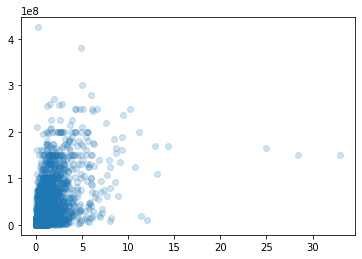

In [28]:
plt.scatter(data=df, x='popularity', y='budget', alpha=1/5);

Before judging let's first remove outliers

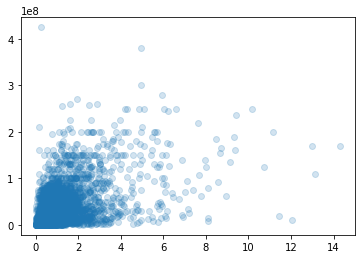

In [29]:
df_temp = df[df['popularity'] < 20] 
plt.scatter(data=df_temp, x='popularity', y='budget', alpha=1/5);

>I certainly can say that the success of a movie is not due to it's high budget 

### Research Question 2  : Does the number of films an actor had participated in affect the popularity of a film?

I used 'one_to_many' function to explode the row which has the entries ,we are interested in the same row, into several rows each row has only one of these entries

In [30]:
def one_to_many(dataframe,column_name):
    #make a copy of the origial dataframe but without the column we're dealing with 
    df_sep = df.drop(column_name,axis=1)
    #then Let's add that column again but with separated entries
    df_sep = df_sep.assign(**{column_name:dataframe[column_name].str.split('|')}).explode(column_name)
    return df_sep

In [43]:
#Asep ---> separated actors
df_Asep = one_to_many(df,'cast')

In [44]:
df_Asep.shape

(24989, 9)

In [45]:
#Let's see how many unique actor
df_Asep['cast'].nunique()

9171

In [46]:
#let's see my boundaries
df_Asep['cast'].value_counts().max(),df_Asep['cast'].value_counts().min()

(58, 1)

In [47]:
#Let's Keep just the most popular actors with threshold equal to 25 movies
df_Asep = df_Asep.groupby('cast').filter(lambda x: len(x) > 25)

In [48]:
df_Asep.shape,df_Asep['cast'].nunique()

((2174, 9), 69)

In [49]:
#I found that groupby() sortes its output Alphabetically so i'll sort the value_counts() output too to have the same order
idx = df_Asep['cast'].value_counts().index.sort_values()

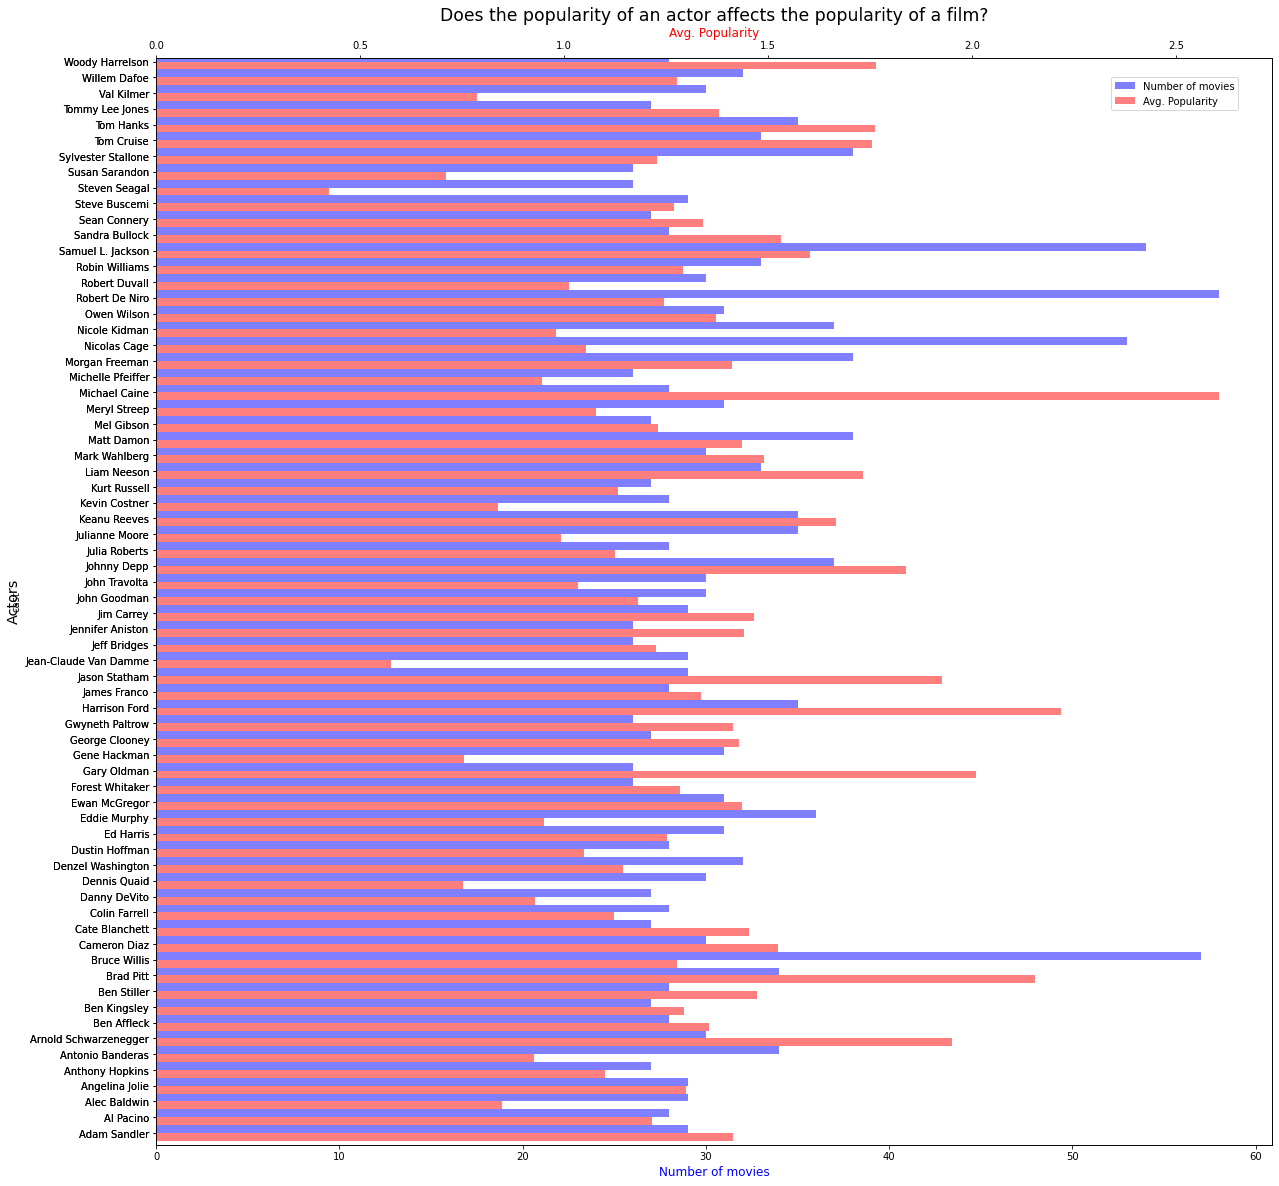

In [71]:
figure, ax1 = plt.subplots(figsize=(20,20))
#Let's plot each actor versus number of movies he participated in 
df_Asep['cast'].value_counts()[idx].plot(kind='barh', ax=ax1, alpha=0.5, color='blue',
                                         label='Number of movies', width=0.5, position=0)
#instantiate a second axis that shares the same y-axis
ax2 = ax1.twiny()
#Let's plot each actor versus the mean of the popularity of all the movies he participated in
df_Asep.groupby('cast')['popularity'].mean().plot(kind='barh', ax=ax2, alpha=0.5, color='red',
                                                  label='Avg. Popularity', width=0.5, position=1)

plt.title('Does the number of films an actor had participated in affect the popularity of a film?', fontsize='xx-large')
ax1.set_ylabel(ylabel='Actors', fontsize='x-large')
ax2.set_ylabel(ylabel='Actors', fontsize='x-large')
ax1.set_xlabel('Number of movies', color='blue', fontsize='large')
ax2.set_xlabel('Avg. Popularity', color='red', fontsize='large')
figure.legend(bbox_to_anchor=(0.88, 0.87));

> Although we can see that some actors participated in small number of movies but still the average of the popularity of these movies is very good.But also we can't ignore the fact that the majority of the actors that participated in several movies have Avg popularity above 1.0(scaled from 0 to 2.5).Consequently we can say that the number of movies an actor participated in can affect the popularity of a movie.

### Research Question 3 : Does the production company have any role in the popularity of a film?

Also I did the same here (with the help of one_to_many function)

In [72]:
df_Csep = one_to_many(df,'production_companies')

In [73]:
df_Csep.shape

(13443, 9)

In [74]:
df_Csep['production_companies'].nunique()

4486

In [75]:
df_Csep['production_companies'].value_counts().max(),df_Csep['production_companies'].value_counts().min()

(360, 1)

In [76]:
#Let's Keep just the companies that produced more than 15
df_Csep = df_Csep.groupby('production_companies').filter(lambda x: len(x) > 15)

In [77]:
df_Csep.shape,df_Csep['production_companies'].nunique()

((4931, 9), 94)

In [79]:
idx = df_Csep['production_companies'].value_counts().index.sort_values()

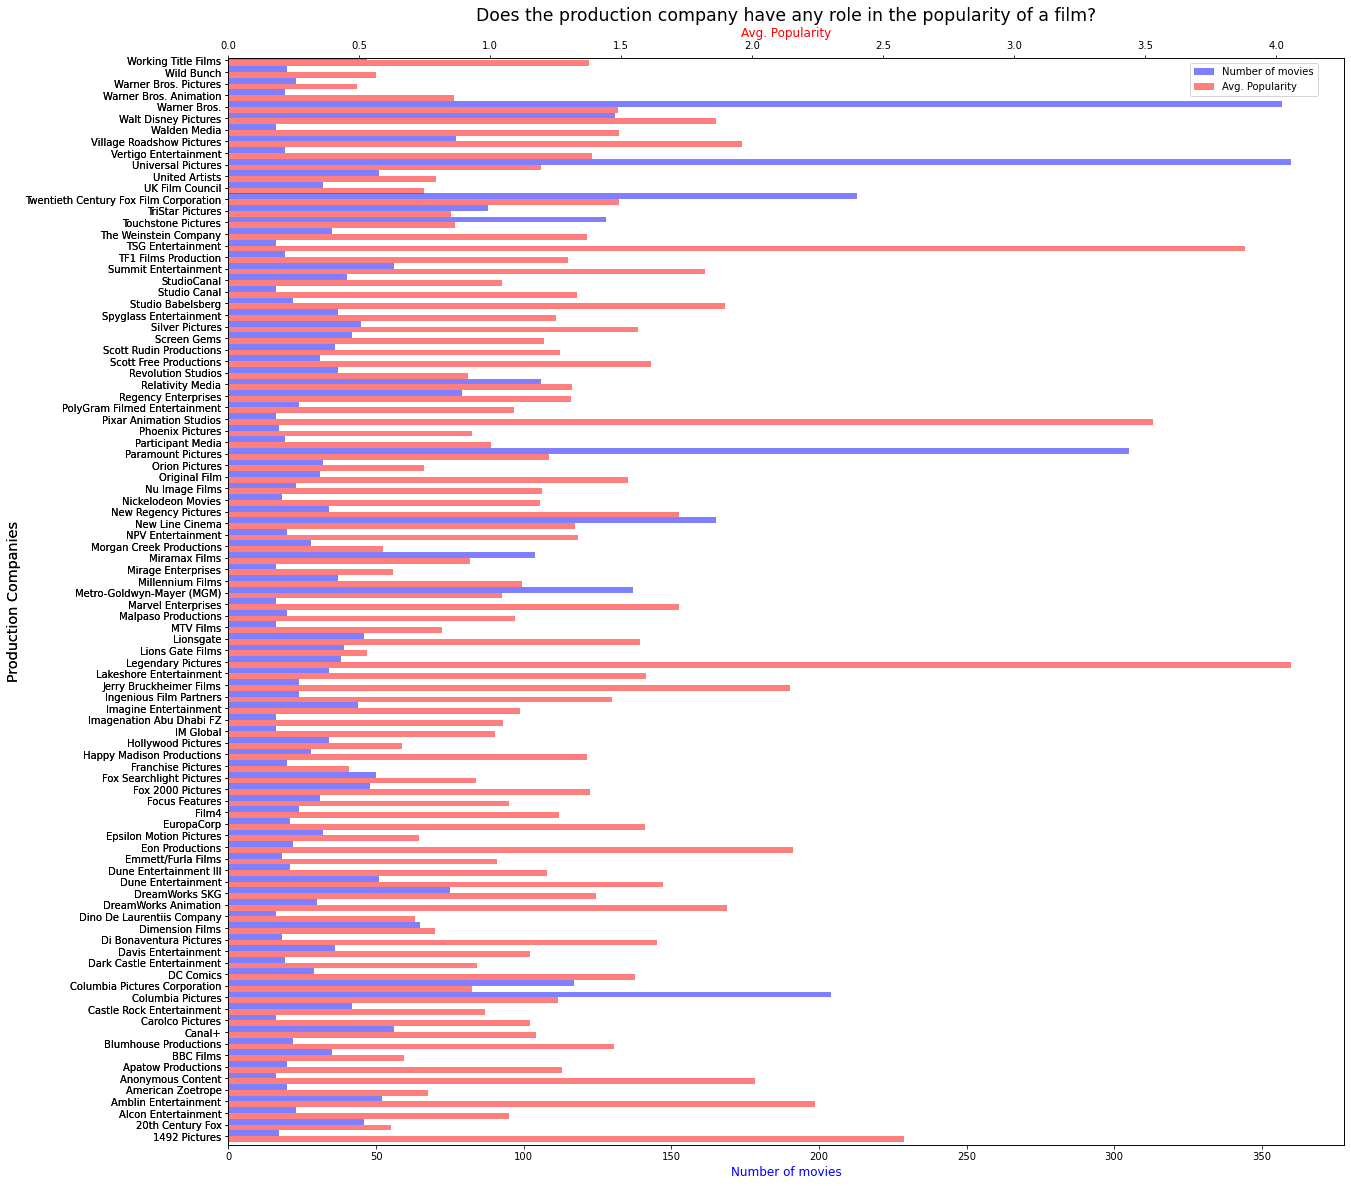

In [83]:
figure, ax1 = plt.subplots(figsize=(20,20))
#Let's plot each actor versus number of movies he participated in 
df_Csep['production_companies'].value_counts()[idx].plot(kind='barh', ax=ax1, alpha=0.5, color='blue',
                                         label='Number of movies', width=0.5, position=0)
#instantiate a second axis that shares the same y-axis
ax2 = ax1.twiny()
#Let's plot each actor versus the mean of the popularity of all the movies he participated in
df_Csep.groupby('production_companies')['popularity'].mean().plot(kind='barh', ax=ax2, alpha=0.5, color='red',
                                                  label='Avg. Popularity', width=0.5, position=1)

plt.title('Does the production company have any role in the popularity of a film?', fontsize='xx-large')
ax1.set_ylabel(ylabel='Production Companies', fontsize='x-large')
ax2.set_ylabel(ylabel='Production Companies', fontsize='x-large')
ax1.set_xlabel('Number of movies', color='blue', fontsize='large')
ax2.set_xlabel('Avg. Popularity', color='red', fontsize='large')
figure.legend(bbox_to_anchor=(0.885, 0.88));

>We can say that the number of movies a production company has produce does affect the popularity of one of its movies slightly.Because also here we can see that companies that produced several movies has a good average popularity.

### Research Question 4 : Who's the best director in this dataset?

In [84]:
#Let's make a threshold here too 
df_dir = df.groupby('director').filter(lambda x: len(x) > 10)

In [85]:
df_dir.shape,df_dir['director'].nunique()

((524, 9), 34)

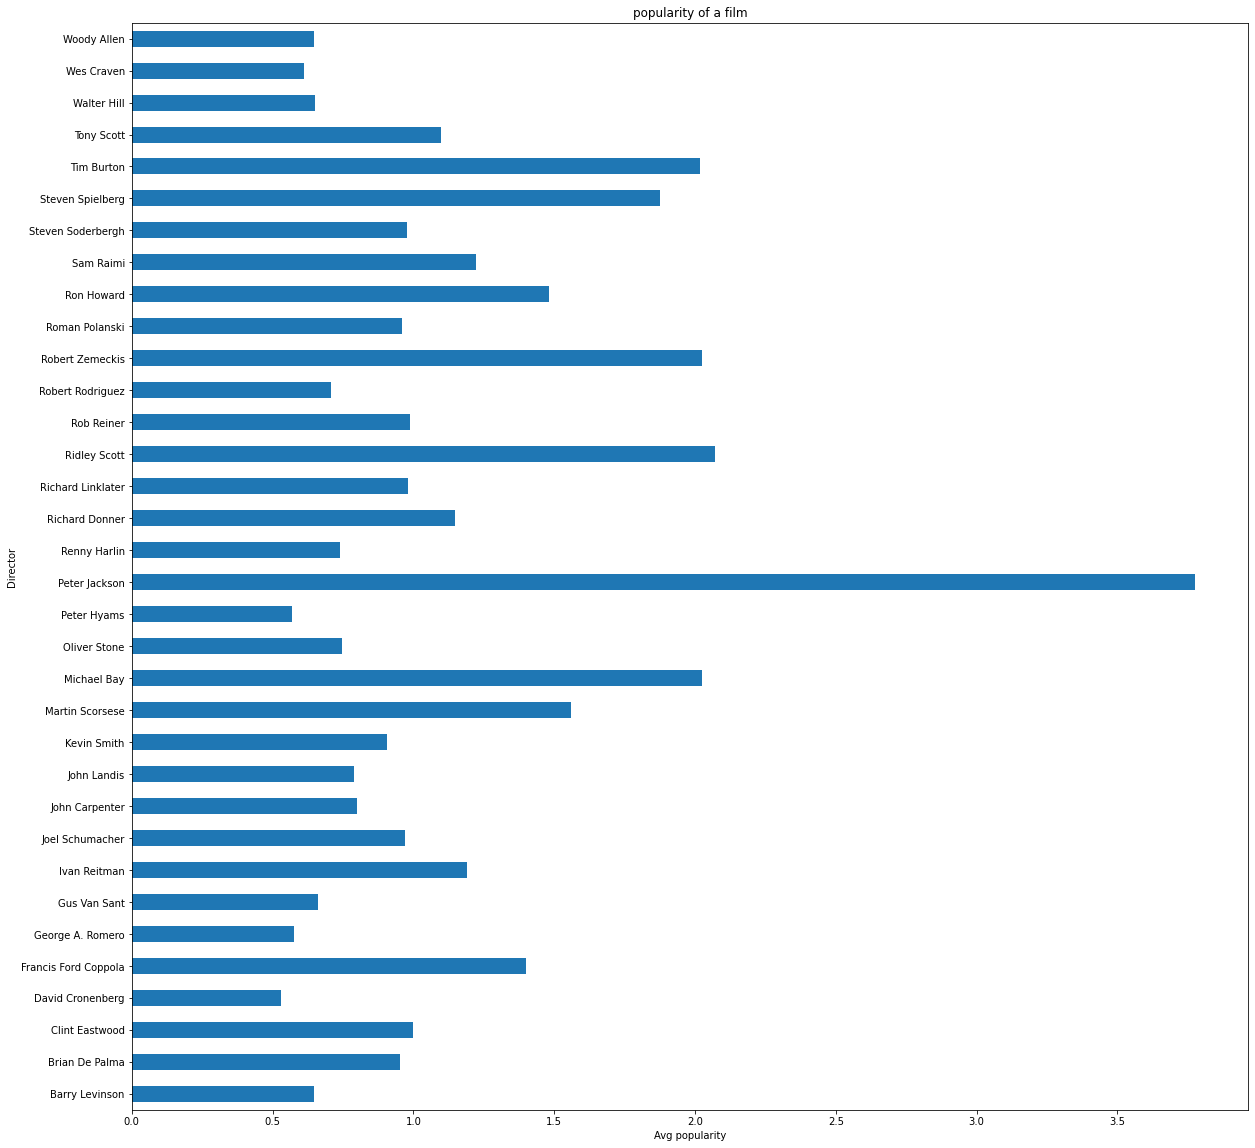

In [94]:
df_dir.groupby('director')['popularity'].mean().plot(kind='barh',figsize=(20,20));
plt.title('popularity of a film');
plt.xlabel('Avg popularity');
plt.ylabel('Director');

>Obviously 'Peter Jackson' is the director who made the most popular films

In [52]:
#let's see his movies
df[df['director'] == 'Peter Jackson']

,popularity,budget,original_title,cast,director,genres,production_companies,vote_average,release_year
634,10.174599,250000000,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,7.1,2014
1418,1.673879,65000000,The Lovely Bones,Rachel Weisz|Mark Wahlberg|Susan Sarandon|Saoi...,Peter Jackson,Fantasy|Drama,WingNut Films|DreamWorks SKG|Key Creatives|Fil...,6.6,2009
2633,8.575419,93000000,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,7.8,2001
3911,8.095275,79000000,The Lord of the Rings: The Two Towers,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,7.8,2002
4213,0.834029,5000000,Heavenly Creatures,Melanie Lynskey|Kate Winslet|Sarah Peirse|Simo...,Peter Jackson,Drama|Fantasy,WingNut Films|Miramax Films|New Zealand Film C...,6.6,1994
4367,4.218933,250000000,The Hobbit: An Unexpected Journey,Ian McKellen|Martin Freeman|Richard Armitage|A...,Peter Jackson,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...,6.9,2012
4949,7.122455,94000000,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,7.9,2003
5431,4.310786,250000000,The Hobbit: The Desolation of Smaug,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,Adventure|Fantasy,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...,7.6,2013
6215,1.508329,207000000,King Kong,Naomi Watts|Jack Black|Adrien Brody|Thomas Kre...,Peter Jackson,Adventure|Drama|Action,WingNut Films|Universal Pictures|Big Primate P...,6.4,2005
8268,0.766646,3000000,Braindead,Tim Balme|Diana PeÃ±alver|Elizabeth Moody|Ian ...,Peter Jackson,Horror|Comedy,WingNut Films|New Zealand Film Commission|Aval...,7.4,1992


### Research Question 5 :  what is the most popular type(genre) of films between (1960-2015)?

I used here 'one_to_many' Function too

In [87]:
df_Gsep = one_to_many(df,'genres')

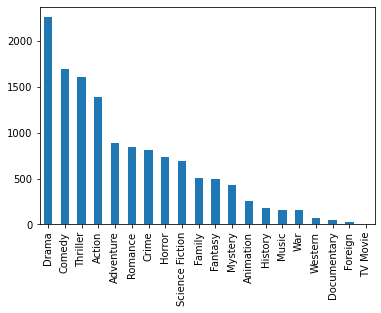

In [88]:
df_Gsep['genres'].value_counts().plot(kind='bar');

>Ooh cool , it seems that drama films were the trend in time from 1960 to 2015

### Research Question 6 : Is the production of movies is increasing or decreasing with respect to time? And what is the year that had the highest production of movies between (1960-2015)?

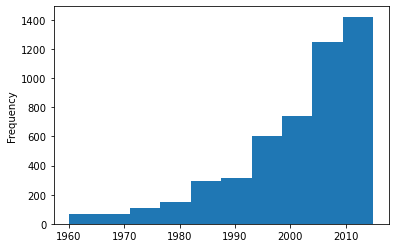

In [89]:
df['release_year'].plot(kind='hist');

>Generally, It seems that the production of the movies is increasing monotonically

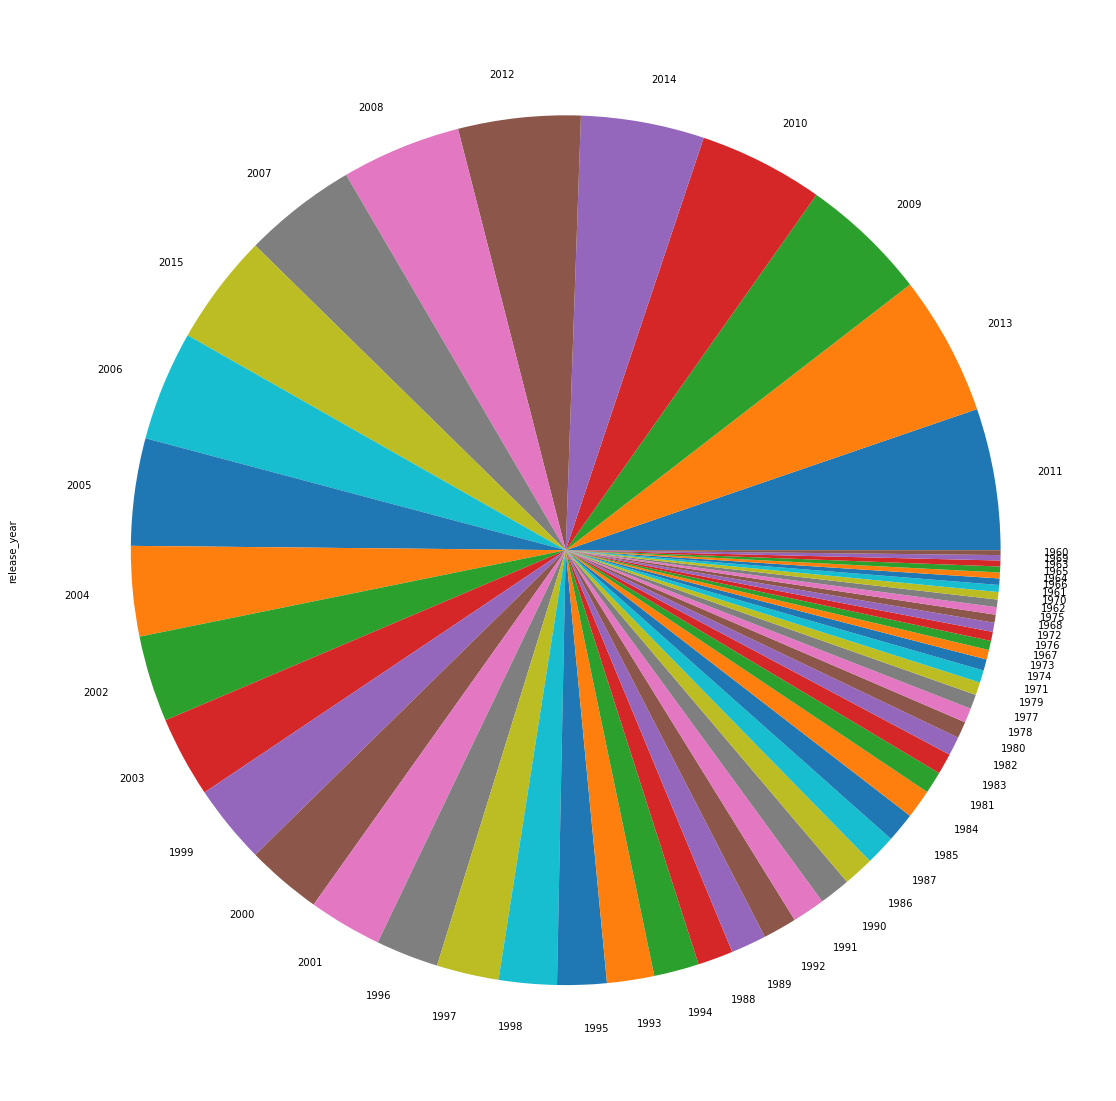

In [90]:
df['release_year'].value_counts().plot(kind='pie',figsize=(20,20));

>It looks like the 2011 is the year with the highest production :) , Let's make sure of that result 

In [91]:
idx = df['release_year'].value_counts().index.sort_values()

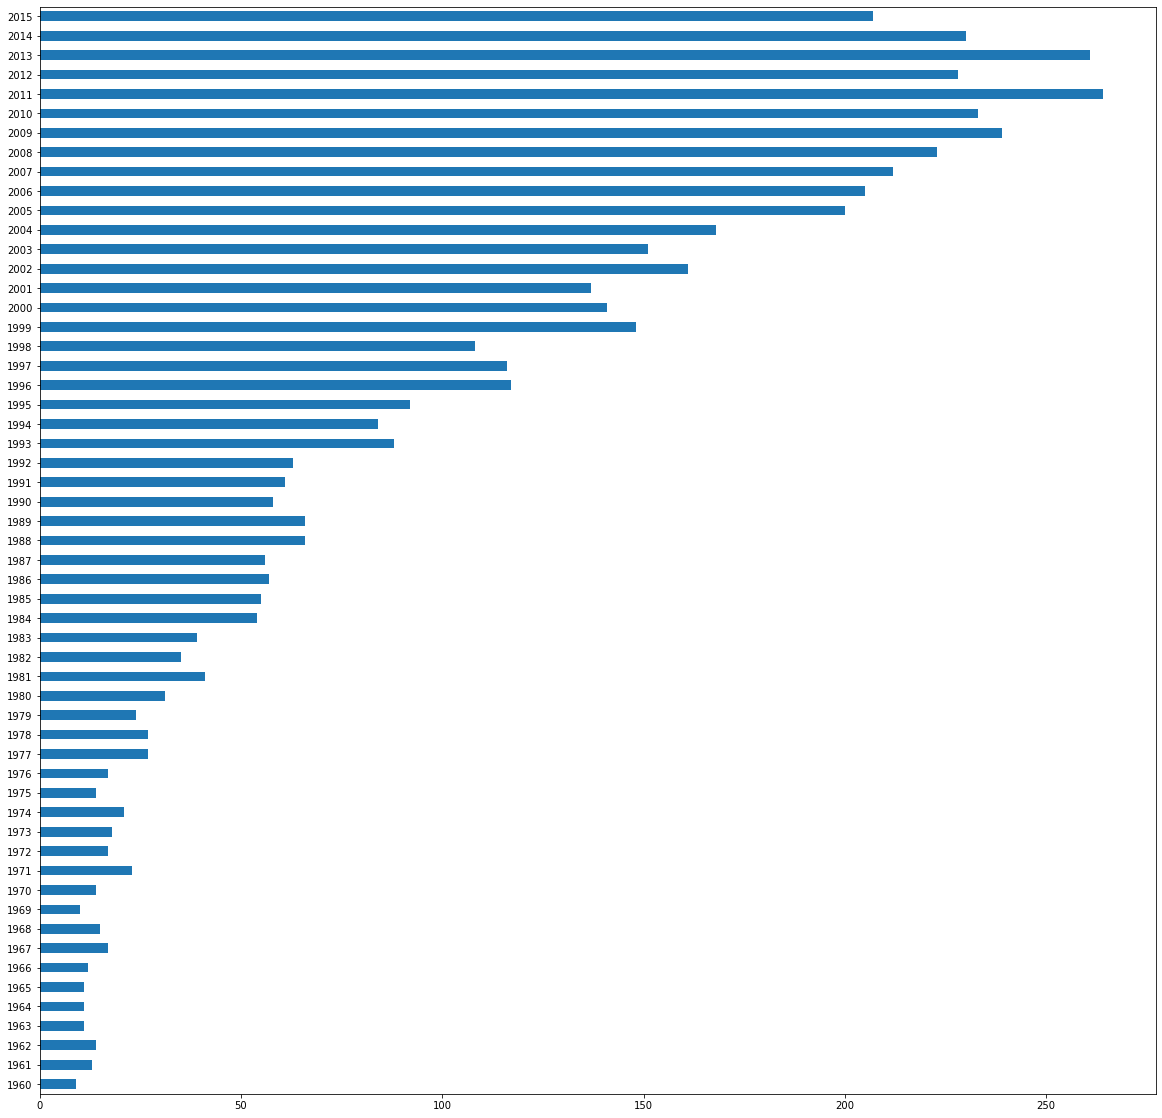

In [93]:
df['release_year'].value_counts()[idx].plot(kind='barh',figsize=(20,20));

>Yeah absolutely , 2011 has the highest production :)

<a id='conclusions'></a>
## Conclusions

> In my previous exploration i took "popularity" of a film as an indication of the success of a film (my dependent variable) and tried to find the independent variables that can affect it and i found that a popular (participated in several movies), actor can really affect the popularity of a film not only that the production company play some role here too ,so if i could combine these two in one variable i think this variable will be a good indicator for the success of a film. 

> I also ,for fun, found the the best director and the dominant genre for this dataset and the year with the highest production :)

**Finally Before finishing this report i want to make some notes :**
- I know that maybe the "popularity" isn't the only measure of how success the film is ,it can be the "revenue" or "vote_average" or somehow merges two or all of them in one variable and make it our feature of interest but to make things abstract as much as i can i chose one of these three only.
- Also i can't deny that the runtime of a movie can affect its popularity but as i mentioned before i wanted the report to be brief but have a good content in the same time.so i tried to use different methods on the data and make the most of it.
- It's undeniable that the data wasn't that good and i was forced to drop a part of it to make it more reasonable...so this result may not be general.

<a id='Websites'></a>
## Websites

- www.stackoverflow.com
- www.pandas.pydata.org
- www.matplotlib.org